In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
filepath = '/home/docboy/Desktop/Option_Pricing/images/'
dataset = '/home/docboy/Desktop/Option_Pricing/datasets/'

In [3]:
sns.set()

# Gaussian

In [29]:
plt.rcParams['figure.figsize'] = [18, 8]
x = np.random.randn(10020000, sigma = 2)

ax = sns.distplot(x, hist = False)


TypeError: randn() got an unexpected keyword argument 'sigma'

In [21]:
?sns.distplot

In [30]:
?np.random.randn

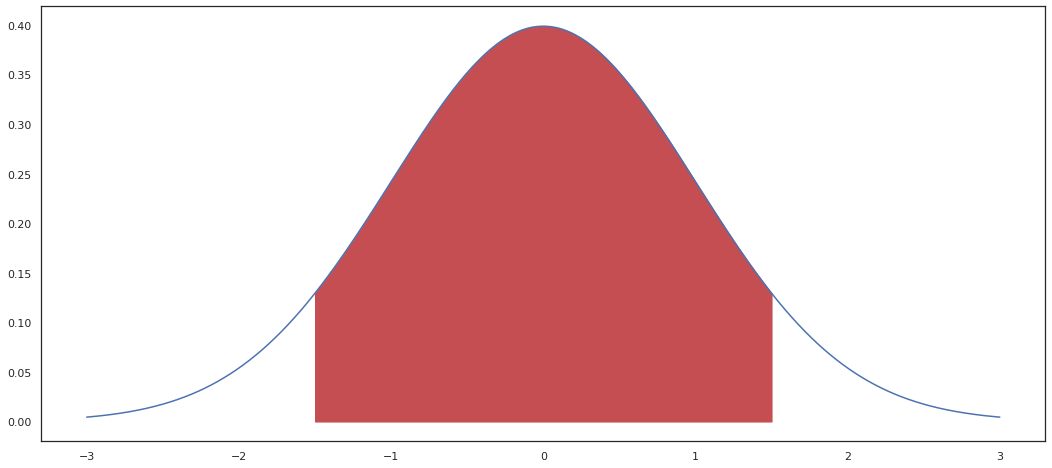

In [56]:

from scipy import stats as stats
mean=0
std=1
x=np.linspace(mean-3*std, mean+3*std,1000)
iq=stats.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

px=np.arange(-1.5, 1.5, 0.00001)
plt.fill_between(px,iq.pdf(px),color='r')

plt.show()

In [50]:
?np.arange

# Q-Q Plot

In [5]:
nfty = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/INDEXVALUE_NIFTY50_2015_2018_combined_raw.csv')
bnfty = pd.read_csv('/home/docboy/Desktop/5th Year/Option Pricing Work/Work/INDEXVALUE_BANKNIFTY_2015_2018_combined_raw.csv')

In [6]:
k = np.log(nfty.loc[:, 'Close']/nfty.loc[:, 'Close'].shift(1) )
k = k.dropna()

In [7]:
# Analysis on BANKNIFTY Close Price
j = np.log(bnfty.loc[:, 'Close']/bnfty.loc[:, 'Close'].shift(1))
j = j.dropna()

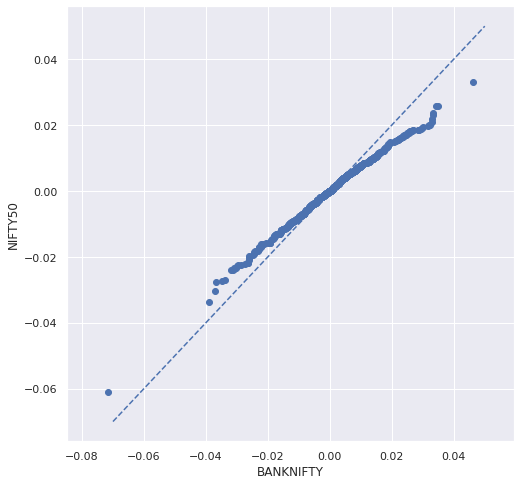

In [16]:
# sns.set(font_scale = )
plt.rcParams['figure.figsize'] = [8, 8]
# Quantile-quantile plot
x = np.linspace(-0.07,0.05,100)
y = x
sns.set()
plt.scatter(np.sort(j), np.sort(k))
plt.xlabel('BANKNIFTY')
plt.ylabel('NIFTY50')
plt.plot(x,y, '--', label = 'Y=X')
plt.savefig(filepath + 'Q-Q Plot NF50 BNF.pdf', format = 'pdf')
plt.show()

## Recent Data

In [50]:
nfty = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/INDEXVALUE_NIFTY50_2019_2020_combined_raw.csv')

In [51]:
nfty['Date'] = pd.to_datetime(nfty['Date'])
df = nfty
k = df[(df.Date > '2019-10-01') & (df.Date < '2019-12-31')]
k_ret = np.log(k.loc[:, "Close"]/k.loc[:, "Close"].shift(1))
k_ret = k_ret.dropna()

df1 = nfty
j = df1[(df1.Date > '2020-01-01') & (df1.Date < '2020-03-31')]
j_ret = np.log(j.loc[:, "Close"]/j.loc[:, "Close"].shift(1))
j_ret = j_ret.dropna()

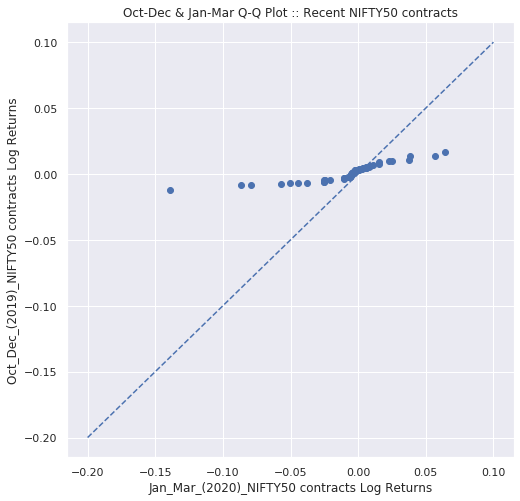

In [57]:
# Quantile-quantile plot
plt.rcParams['figure.figsize'] = [8, 8]
x = np.linspace(-0.2,.1,100)
y = x
plt.figure()
plt.scatter(np.sort(j_ret[3:]), np.sort(k_ret))
plt.xlabel('Jan_Mar_(2020)_NIFTY50 contracts Log Returns')
plt.ylabel('Oct_Dec_(2019)_NIFTY50 contracts Log Returns')
plt.plot(x,y, '--', label = 'Y=X')
plt.title("Oct-Dec & Jan-Mar Q-Q Plot :: Recent NIFTY50 contracts")
plt.savefig(filepath + 'recent_data_qqplot_.pdf', format = 'pdf')
plt.show()

# ECDF Plots

In [19]:
# Nifty 50
cp = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/CP.csv')

In [20]:
cp

,-1.000000000000000000e+00
0,-1.0
1,0.0
2,1.0
3,-1.0
4,-1.0
...,...
2697,2.0
2698,0.0
2699,1.0
2700,2.0


In [21]:
cp_ser = cp.sort_values(by = '-1.000000000000000000e+00')
cp_ser
cp_ser[len(cp_ser)] = cp_ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(cp_ser))
ser_cdf = pd.Series(cum_dist, index=cp_ser.index)
# cp_ser

In [22]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [33]:
ser_cdf.values

array([0.00000000e+00, 3.70233247e-04, 7.40466494e-04, ...,
       9.99259534e-01, 9.99629767e-01, 1.00000000e+00])

In [35]:
cp1 = cp_ser.reset_index(drop = True)
cp1 = cp1[cp1["-1.000000000000000000e+00"] >= -5]
low_val = cp1.index[0]
y1 = low_val/len(cp_ser)


cp2 = cp_ser.reset_index(drop = True)
cp2 = cp2[cp2["-1.000000000000000000e+00"] <= 5]
high_val = cp2.index[-1]
y2 = high_val/len(cp_ser)

In [36]:
y2-y1

0.9744633604737232

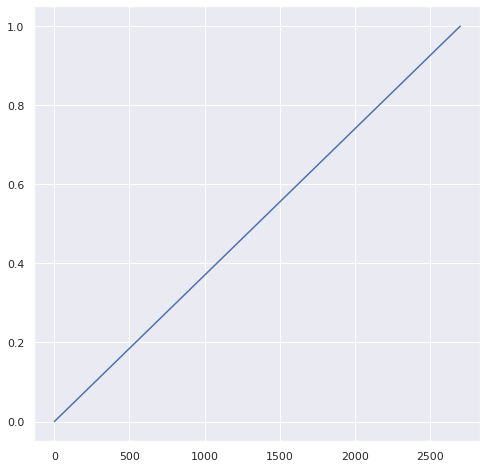

In [47]:
ser_cdf = ser_cdf.reset_index(drop = True)
plt.plot(ser_cdf)

In [24]:
dev = np.std(cp)

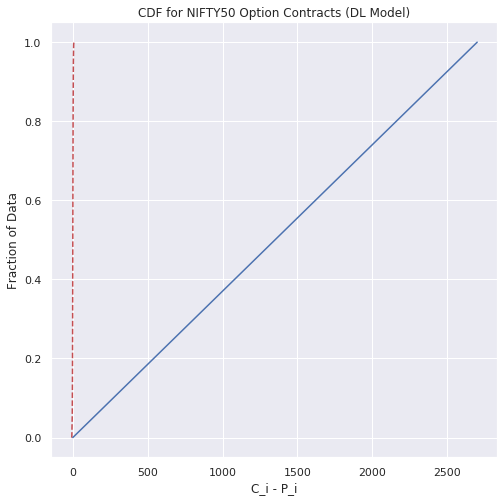

In [48]:
plt.rcParams['figure.figsize'] = [8, 8]
k = np.random.normal(0, dev, 100000)
x, y = ecdf(k)

plt.plot(x, y, '--r')
plt.plot(ser_cdf, 'b')
plt.xlabel("C_i - P_i")
plt.ylabel("Fraction of Data")
# axes = plt.gca()
# axes.set_xlim([-10,8])
# axes.set_ylim([0,1])
# plt.axvline(x=2, c = 'g', ls='--')
# plt.axvline(x=-2, c = 'g', ls='--')
# plt.axhline(y = y1, c = 'g', ls = '--')
# plt.axhline(y = y2, c = 'g', ls = '--')
# axes.axvspan(-2, 2, alpha=0.5, color='grey')
plt.title("CDF for NIFTY50 Option Contracts (DL Model)")
# plt.savefig(filepath + 'ECDF_NF50.pdf', format = 'pdf')
plt.show()

# Close/K plot

In [28]:
data = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/NIFTY50_feature_set_ECDF_complete.csv')

In [29]:
# data=data.loc[data['ttm']>3,:]
# data=data.loc[data['ttm']<=45,:]
# bound=np.percentile(data['percentage'],100)
# data=data.loc[data['percentage']<bound]

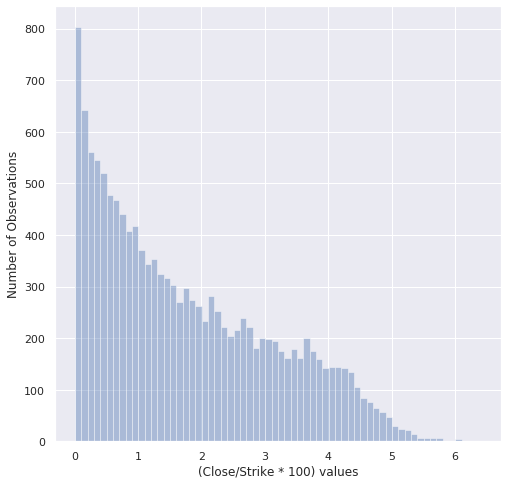

In [39]:
# original Data
sns.distplot(data["percentage"], kde = False, bins = np.arange(min(data["percentage"]), 
                                                               max(data["percentage"]) + 0.1, 0.1))
plt.xlabel("(Close/Strike * 100) values")
plt.ylabel("Number of Observations")
plt.savefig(filepath + 'percentage_hist.pdf', format = 'pdf')
plt.show()

# EM vs Bins Plot

In [4]:
data = pd.read_csv('/home/docboy/Desktop/Option_Pricing/datasets/em_vs_bins.csv')

In [5]:
# data["Bins"] = 5/data["Bins"]
# data = data.sort_values(by = "Bins")

In [6]:
data['Scale'] = 5/data['Bins']
ticks = round(data["Scale"], 3)
pos = data["Bins"]

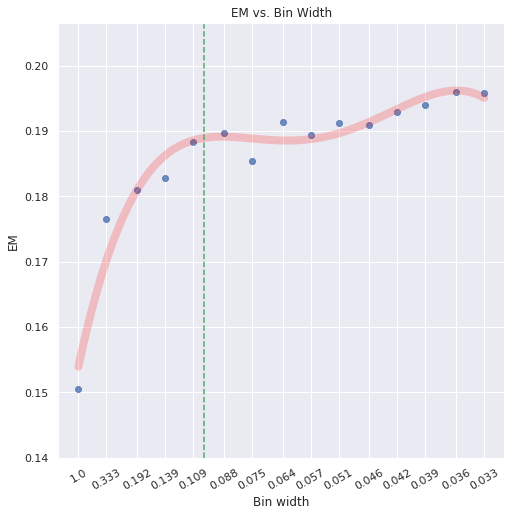

In [7]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
sns.regplot(x = "Bins", y = "EM", data = data, order =4.8 , ci=0, truncate = True, line_kws = {'alpha' : 0.2,
                                                                                              'color' : 'red',
                                                                                              'lw' : 8})
plt.title('EM vs. Bin Width')
axes = plt.gca()
plt.xticks(pos, ticks, rotation = 30)


# for i, txt in enumerate(data["EM"]):
#     axes.annotate(round(txt,3), (data.loc[i, "Bins"], data.loc[i, "EM"]), ha = "right")

# plt.yticks(data["EM"], rotation = 30)
# axes.set_xlim([1.02, 0])
plt.axvline(x=50, c = 'g', ls='--')
plt.xlabel("Bin width")
plt.savefig(filepath + 'Em_vs_numberof_BINS.pdf', format = 'pdf')

# Volatility vs EM plot for BM and GBM

## BM NF50

In [9]:
x_data = pd.read_csv(dataset + 'XresultsBM.csv')
d_data = pd.read_csv(dataset + 'DresultsBM.csv')

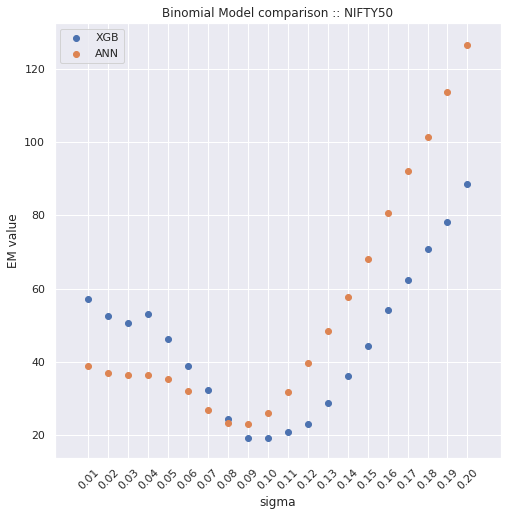

In [10]:
plt.scatter(x_data['sigma'], x_data['nem'])
plt.scatter(d_data['sigma'], d_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['XGB','ANN' ])
plt.title('Binomial Model comparison :: NIFTY50')
plt.savefig(filepath + 'Binomial_Model_Comparison_NF50.pdf', format = 'pdf')

## GBM NF50

In [11]:
x_data = pd.read_csv(dataset + 'XresultsGBM.csv')
d_data = pd.read_csv(dataset + 'DresultsGBM.csv')

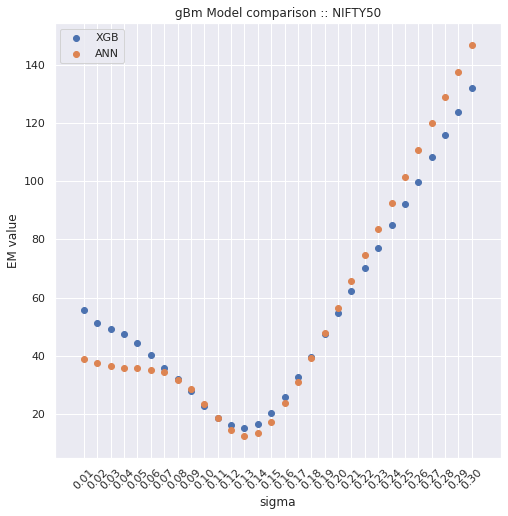

In [12]:
plt.scatter(x_data['sigma'], x_data['nem'])
plt.scatter(d_data['sigma'], d_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['XGB','ANN' ])
plt.title('gBm Model comparison :: NIFTY50')
plt.savefig(filepath + 'gBm_Model_Comparison_NF50.pdf', format = 'pdf')

## BM BNF

In [13]:
x_data = pd.read_csv(dataset + 'BANKXresultsBM.csv')
d_data = pd.read_csv(dataset + 'BANKDresultsBM.csv')

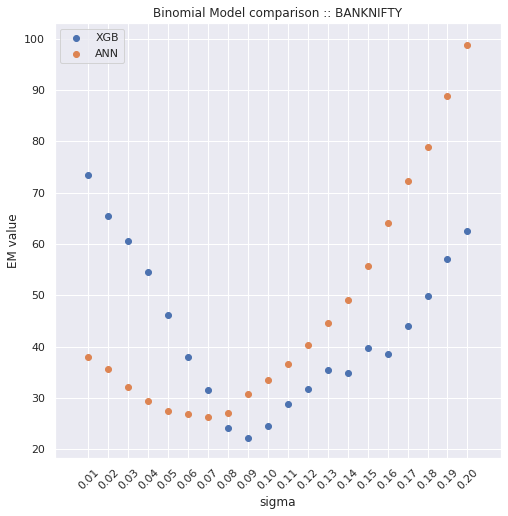

In [14]:
plt.scatter(x_data['sigma'], x_data['nem'])
plt.scatter(d_data['sigma'], d_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['XGB','ANN' ])
plt.title('Binomial Model comparison :: BANKNIFTY')
plt.savefig(filepath + 'Binomial_Model_Comparison_BNF.pdf', format = 'pdf')

## GBM BNF

In [15]:
x_data = pd.read_csv(dataset + 'BANKXresultsGBM.csv')
d_data = pd.read_csv(dataset + 'BANKDresultsGBM.csv')

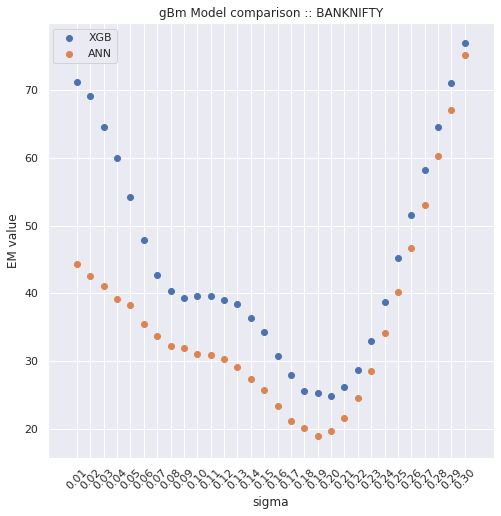

In [16]:
plt.scatter(x_data['sigma'], x_data['nem'])
plt.scatter(d_data['sigma'], d_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['XGB','ANN' ])
plt.title('gBm Model comparison :: BANKNIFTY')
plt.savefig(filepath + 'gBm_Model_Comparison_BNF.pdf', format = 'pdf')

## COMBINED Asset

In [4]:
x_data = pd.read_csv(dataset + 'COMBINED_XresultsGBM.csv')
d_data = pd.read_csv(dataset + 'COMBINED_DresultsGBM.csv')

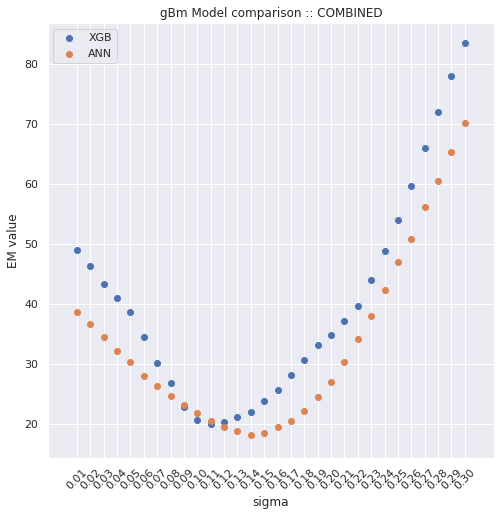

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(x_data['sigma'], x_data['nem'])
plt.scatter(d_data['sigma'], d_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['XGB','ANN' ])
plt.title('gBm Model comparison :: COMBINED')
plt.savefig(filepath + 'gBm_Model_Comparison_COMBINED.pdf', format = 'pdf')

## Every Model

In [6]:
combined_d_data = pd.read_csv(dataset + 'COMBINED_DresultsGBM.csv')
bnf_d_data = pd.read_csv(dataset + 'BANKDresultsGBM.csv')
nf50_d_data = pd.read_csv(dataset + 'DresultsGBM.csv')

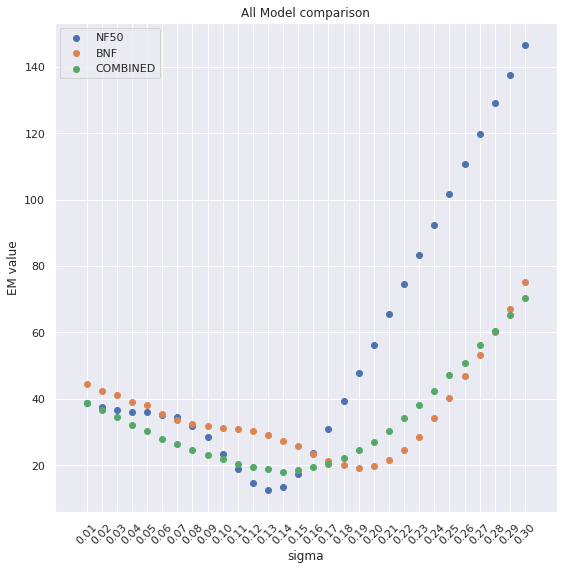

In [7]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.scatter(nf50_d_data['sigma'], nf50_d_data['nem'])
plt.scatter(bnf_d_data['sigma'], bnf_d_data['nem'])
plt.scatter(combined_d_data['sigma'], combined_d_data['nem'])

plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['NF50','BNF', 'COMBINED' ])
plt.title('All Model comparison')
plt.savefig(filepath + 'ALL_Model_COMBINED_ANN.pdf', format = 'pdf')

In [8]:
combined_x_data = pd.read_csv(dataset + 'COMBINED_XresultsGBM.csv')
bnf_x_data = pd.read_csv(dataset + 'BANKXresultsGBM.csv')
nf50_x_data = pd.read_csv(dataset + 'XresultsGBM.csv')

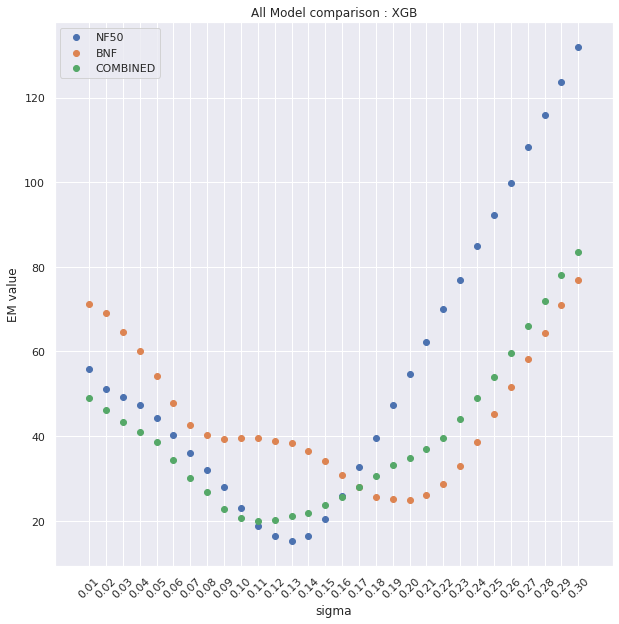

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(nf50_x_data['sigma'], nf50_x_data['nem'])
plt.scatter(bnf_x_data['sigma'], bnf_x_data['nem'])
plt.scatter(combined_x_data['sigma'], combined_x_data['nem'])
plt.xticks(x_data['sigma'], rotation = 45)
plt.xlabel("sigma")
plt.ylabel("EM value")
plt.legend(['NF50','BNF', 'COMBINED' ])
plt.title('All Model comparison : XGB')
plt.savefig(filepath + 'ALL_Model_COMBINED_XGB.pdf', format = 'pdf')

In [60]:
?plt.scatter

# IV plots

In [4]:
data = pd.read_csv(dataset + 'NearATM/2018_Combined_DL_NIFTY_approach_3.csv')

In [5]:
data

,date,lowerIV,higherIV,actualIV,LowerLimIV,UpperLimIV
0,2019-04-02,0.113,0.128,0.150,0.078,0.155
1,2019-04-03,0.116,0.148,0.164,0.108,0.182
2,2019-04-04,0.123,0.156,0.144,0.115,0.191
3,2019-04-09,0.100,0.132,0.145,0.095,0.166
4,2019-04-10,0.116,0.152,0.154,0.112,0.188
...,...,...,...,...,...,...
201,2020-04-07,0.435,0.445,0.518,0.413,0.467
202,2020-04-08,0.496,0.509,0.497,0.468,0.536
203,2020-04-09,0.444,0.457,0.412,0.415,0.485
204,2020-04-13,0.474,0.487,0.495,0.450,0.512


In [6]:
# plt.rcParams['figure.figsize'] = [20, 10]

# fig, ax = plt.subplots()
# # sns.lineplot(x = range(100), y = data.loc[:99, "lowerIV"])

# # sns.lineplot(x = range(100), y = data.loc[:99, "higherIV"])

# sns.lineplot(x = range(100), y = data.loc[:99, "actualIV"], color = 'red')

# ax.fill_between(range(100), data.loc[:99, 'LowerLimIV'], data.loc[:99, 'UpperLimIV'], alpha=0.2)


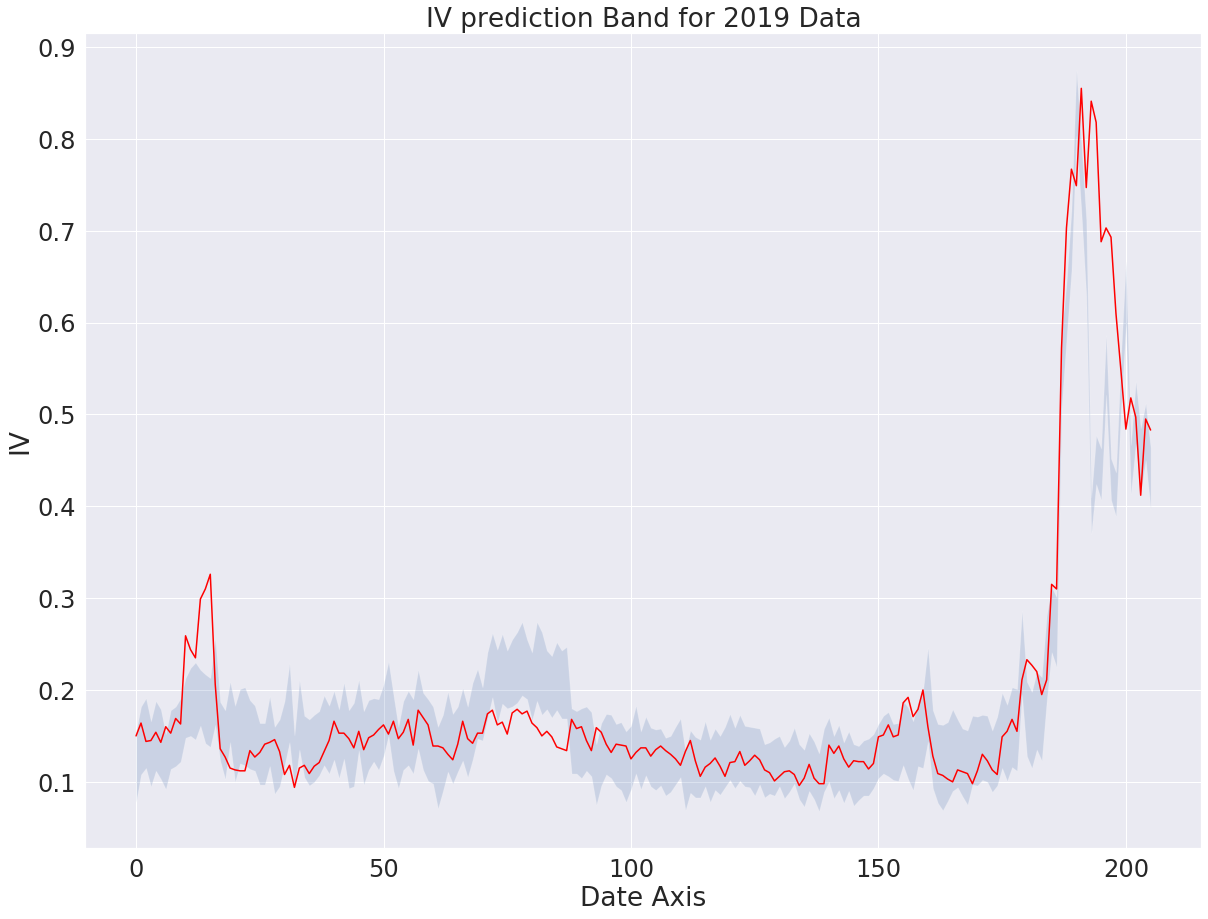

In [7]:
sns.set(font_scale = 2.2)
plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots()

sns.lineplot(x = range(len(data)), y = data.loc[:, "actualIV"], color = 'red')

ax.fill_between(range(len(data)), data.loc[:, 'LowerLimIV'], data.loc[:, 'UpperLimIV'], alpha=0.2)

plt.xlabel("Date Axis")
plt.ylabel("IV Value")
# plt.legend(['NF50','BNF', 'COMBINED' ])
plt.title('IV prediction Band for 2019 Data')
plt.savefig(filepath + 'IV_pred_2019.pdf', format = 'pdf')


In [10]:
len(data[(data['actualIV'] > data['UpperLimIV'])])

27

In [11]:
 len(data[(data['actualIV'] < data['LowerLimIV'])])

25

In [13]:
52/206

0.2524271844660194

In [12]:
len(data)

206

## 2018 data IV fluc plot

In [17]:
df = pd.read_csv(dataset + 'NearATM/2018_Combined_DL_NIFTY_approach_3.csv')

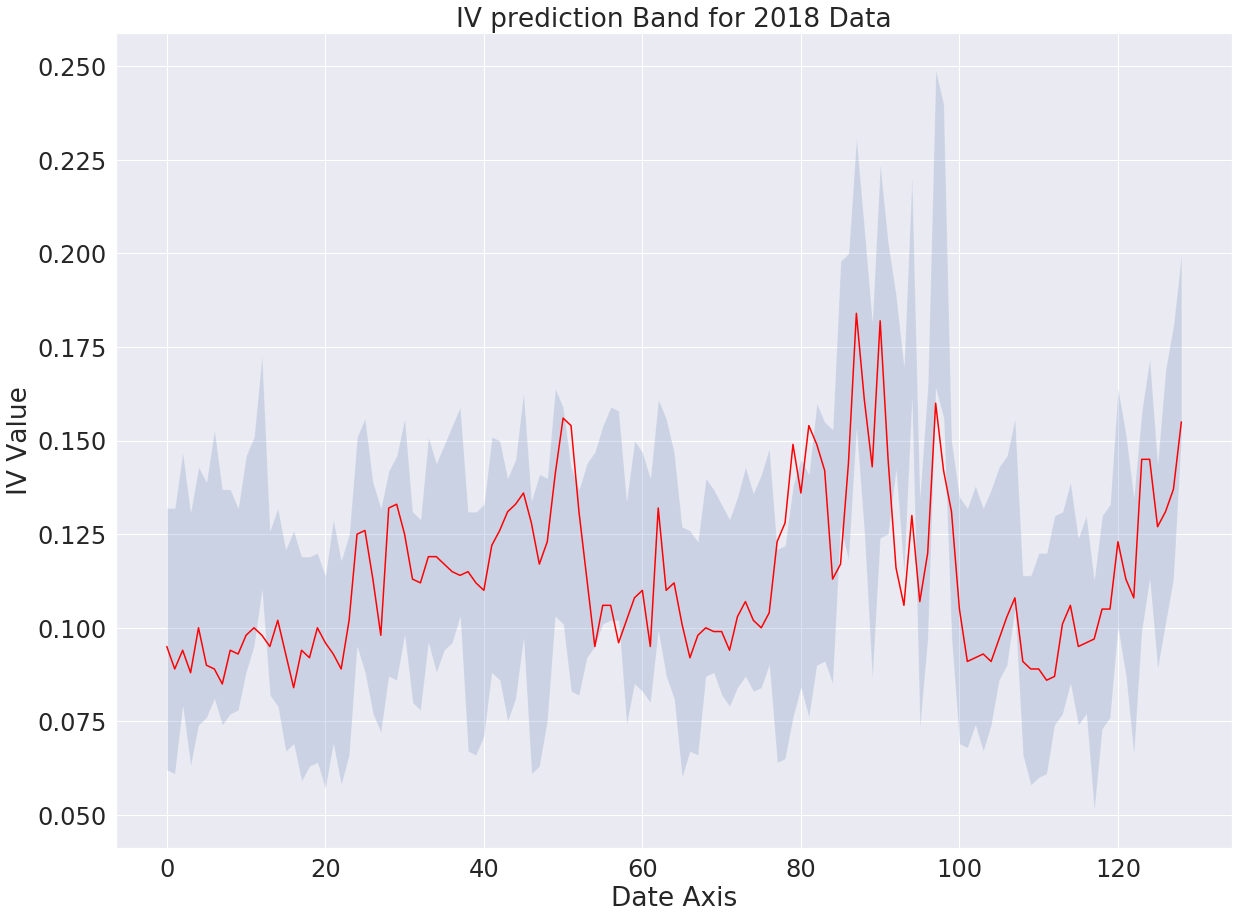

In [18]:
sns.set(font_scale = 2.2)
plt.rcParams['figure.figsize'] = [20, 15]

fig, ax = plt.subplots()

sns.lineplot(x = range(len(df)), y = df.loc[:, "actualIV"], color = 'red')

ax.fill_between(range(len(df)), df.loc[:, 'LowerLimIV'], df.loc[:, 'UpperLimIV'], alpha=0.2)

plt.xlabel("Date Axis")
plt.ylabel("IV Value")
# plt.legend(['NF50','BNF', 'COMBINED' ])
plt.title('IV prediction Band for 2018 Data')
plt.savefig(filepath + 'IV_pred_2018.pdf', format = 'pdf')


In [11]:
df[(df['actualIV'] > df['UpperLimIV'])]

,date,lowerIV,higherIV,actualIV,LowerLimIV,UpperLimIV
51,2017-12-14,0.089,0.116,0.154,0.083,0.143
77,2018-01-22,0.090,0.101,0.123,0.064,0.121
78,2018-01-23,0.090,0.101,0.128,0.065,0.122
79,2018-01-24,0.106,0.117,0.149,0.076,0.138
81,2018-01-29,0.105,0.118,0.154,0.076,0.141


In [12]:
 df[(df['actualIV'] < df['LowerLimIV'])]

,date,lowerIV,higherIV,actualIV,LowerLimIV,UpperLimIV
12,2017-10-19,0.094,0.138,0.098,0.110,0.173
57,2017-12-22,0.075,0.124,0.096,0.102,0.158
85,2018-02-02,0.160,0.173,0.117,0.127,0.198
92,2018-02-21,0.161,0.171,0.116,0.142,0.189
93,2018-02-28,0.139,0.149,0.106,0.114,0.170
94,2018-03-07,0.186,0.198,0.130,0.161,0.221
97,2018-03-21,0.192,0.215,0.160,0.164,0.249
98,2018-03-23,0.168,0.202,0.142,0.156,0.240


In [13]:
len(df)

129

In [17]:

13/129

0.10077519379844961

## Ci vs Pi Plots

In [137]:
sns.set(font_scale = 1.2)

In [138]:
data = pd.read_csv(dataset + 'price_vals/Combined_DL_NIFTY_approach_3.csv')

In [139]:
data

,date,lower_p,higher_p,actual_p,LowerLim_p,UpperLim_p
0,2017-10-03,232.8,242.50,221.2,213.4,261.90
1,2017-10-03,118.2,128.05,120.3,98.5,147.75
2,2017-10-03,10.2,20.40,12.2,-10.2,40.80
3,2017-10-03,20.3,30.45,17.6,0.0,50.75
4,2017-10-03,20.2,30.30,24.7,0.0,50.50
...,...,...,...,...,...,...
2674,2018-09-26,168.0,179.20,149.3,145.6,201.60
2675,2018-09-26,91.2,102.60,70.8,68.4,125.40
2676,2018-09-26,90.8,102.15,87.9,68.1,124.85
2677,2018-09-26,222.0,233.10,203.9,199.8,255.30


In [140]:
data['av_p'] = (data['lower_p']+data['higher_p'])/2

Text(0.5, 0, 'predictions')

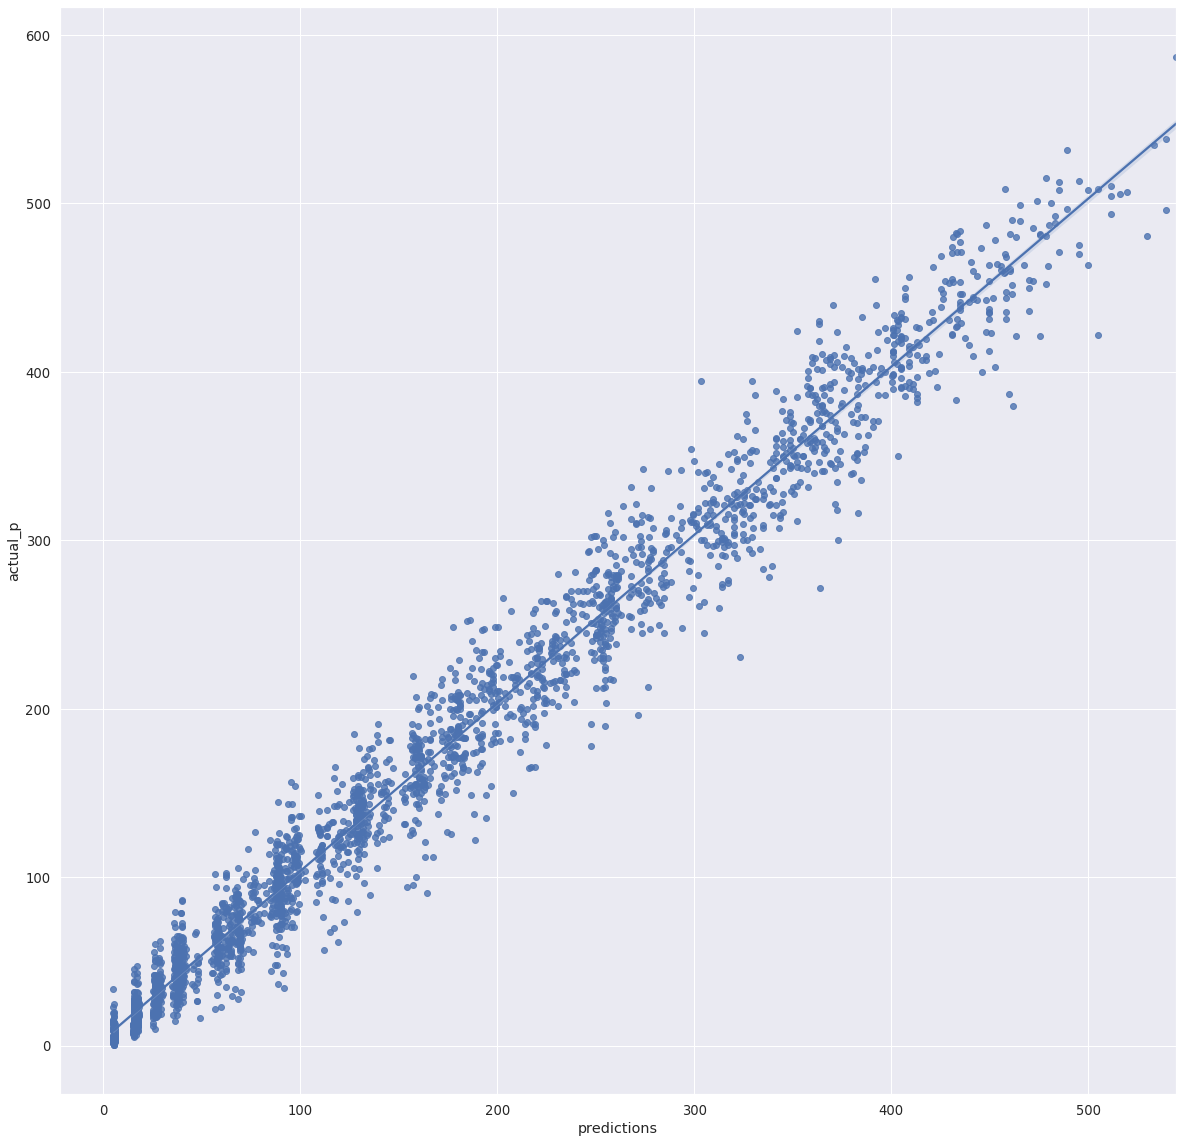

In [141]:

fig, ax = plt.subplots()
sns.regplot(data['av_p'], data['actual_p'], data = data.loc[:, 'av_p'])


# x = np.linspace(100, 280 ,100)
# y = x
# plt.plot(x, y)


plt.xlabel('predictions')






In [142]:
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
def orthoregress(x, y):
    """Perform an Orthogonal Distance Regression on the given data,
    using the same interface as the standard scipy.stats.linregress function.
    Arguments:
    x: x data
    y: y data
    Returns:
    [m, c, nan, nan, nan]
    Uses standard ordinary least squares to estimate the starting parameters
    then uses the scipy.odr interface to the ODRPACK Fortran code to do the
    orthogonal distance calculations.
    """
    linreg = linregress(x, y)
    mod = Model(f)
    dat = Data(x, y)
    od = ODR(dat, mod, beta0=linreg[0:2])
    out = od.run()

    return list(out.beta)


def f(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return (p[0] * x) + p[1]

In [143]:
plt.rcParams['figure.figsize'] = [20, 10]
a, b = orthoregress(data['av_p'], data["actual_p"])

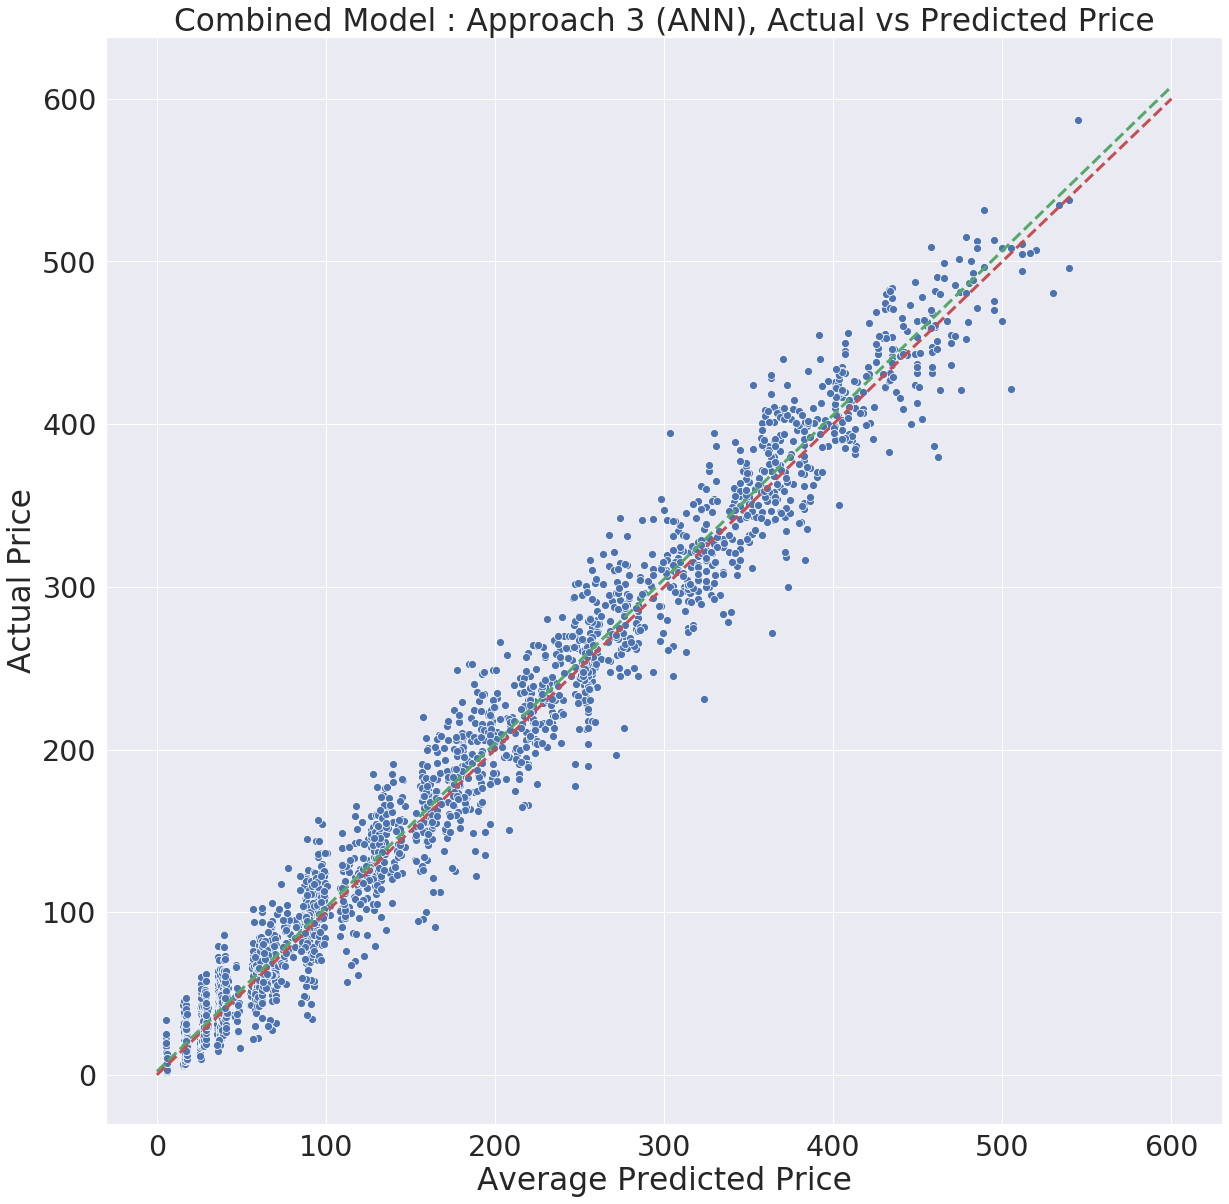

In [151]:
sns.set(font_scale = 2.6)

plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots()
sns.scatterplot(data['av_p'], data['actual_p'], s = 65)


x = np.linspace(0, 600 ,500)
y = a*x + b
plt.plot(x, y, '--g', linewidth = 3)


x = np.linspace(0, 600 ,500)
y = x
plt.plot(x, y, '--r', linewidth = 3)

# ax.set_xlim([90,250])
# ax.set_ylim([90,250])

plt.xlabel("Average Predicted Price")
plt.ylabel("Actual Price")
plt.title('Combined Model : Approach 3 (ANN), Actual vs Predicted Price')
plt.savefig(filepath + 'Combined Model : Approach 3 (ANN), Actual vs Predicted Price.pdf', format = 'pdf')
